In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import FancyArrowPatch,Rectangle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import proj3d

plt.rcParams["figure.figsize"] = [12, 9]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


## APMA E2000

# Lecture 14

## Announcements

  - No quiz 6 this week. 
    - Lab 02 - coming
  - Homework 8 due Tuesday, March 24.
    

# One-minute Review

  - To find local min/max of a function $f$ on a level set $g = c$, solve 
  $$ \nabla f = \lambda \nabla g$$
  
  or look where $\nabla g = \vec 0.$
  
  

# Lecture 14

  ## Intro to Multiple Integration.


  - Objectives

<ul><ul><li>Define the double integral</li></ul></ul>

<ul><ul><li>Compute using iterated integrals</li></ul></ul>

<ul><ul><li>Change the order of integration</li></ul></ul>

<ul><ul><li>Convert from rectangular to polar coordinates.</li></ul></ul>
    

  - Resources
    - Content
      - Stewart: §15.1
      - New Strang: [§5.1](https://openstax.org/books/calculus-volume-3/pages/5-1-double-integrals-over-rectangular-regions) [§5.2](https://openstax.org/books/calculus-volume-3/pages/5-2-double-integrals-over-general-regions) [§5.3](https://openstax.org/books/calculus-volume-3/pages/5-3-double-integrals-in-polar-coordinates)
      - [Slides](https://e2000.columbiajupyter2.org/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fdrewyoungren%2Fmvc-sp20&urlpath=tree%2Fmvc-sp20%2Fslide_notebooks%2Fmvc-L14.ipynb) via JupyterHub
    - Practice
      - Mooculus: [Multiple Integrals](https://ximera.osu.edu/mooculus/calculus3/multipleIntegrals/titlePage) [Polar Coordinnates](https://ximera.osu.edu/mooculus/calculus3/commonCoordinates/digInPolarCoordinates)
    - Extras
      - CalcBLUE: [Integrals](https://www.math.upenn.edu/~ghrist/BLUE.html#VOL3) 

# Remember Integration?

Recall the definition of a definite integral.

$$\int_a^b f(x)\,dx$$

 $$ = \lim _{N \to \infty} \sum_{i=0}^N f(x_i^*) \Delta x_i$$
 
where $x_i^*$ is a sample point in the $i$th subinterval of $[a,b]$ and $\Delta x_i$ is the width of the $i$th subinterval (often $\frac{b-a}{N}$).

 $$\lim _{N \to \infty} \sum_{i=1}^N f(x_i^*) \Delta x_i$$


In [2]:
@interact
def _(N=(1,22),s=(0.,1.,.25),
      f= fixed(lambda x: 1 - x**2 + x**3/4),
      a=fixed(0),b=fixed(2)
     ):
    X = np.linspace(-1/2,5/2,100)
    plt.figure(figsize=(9,9))
    plt.plot(X,f(X),X,np.zeros_like(X),'k');
    ax = plt.gca()
    dx = (b-a)/N
    tot = 0
    for i in range(N):
        xi = a + (i)*dx
        yi = f(xi+s*dx)
        tot += yi
        if yi >=0:
            c = 'b'
        else: 
            c = 'r'
        ax.add_patch(Rectangle((xi,0),dx,yi,alpha=.4,color=c))
    ax.set_title(f"$\int_0^2(1-x^2+x^3/4)dx \sim $ {tot * dx:.5f}",fontsize=17)
                                          
                            

interactive(children=(IntSlider(value=11, description='N', max=22, min=1), FloatSlider(value=0.5, description=…

In [3]:
from scipy.integrate import quad

quad(lambda x: 1 - x**2 + x**3/4,0,2)

(0.33333333333333326, 1.3047217069399301e-14)

# Multiple Integration

Start with a question:

##### What is the average altitude of Bolivia?

<img alt="Topographical map of Bolivia" src="https://legacy.lib.utexas.edu/maps/americas/bolivia_rel93.jpg" width="50%" />

#### ingredients:
  - $f(x,y)$ altitude as a function of horizontal and vertical position
  - $\mathcal B$ the set of coordinates $(x,y)$ that make up Bolivia
  

  $$\text{Average altidude} = f_\text{avg} = \frac{1}{\operatorname{Area}(\mathcal B)} \iint_\mathcal B f\,dA$$

# Double Integral

Consider the rectangle $\mathcal{R} = [a,b]\times[c,d] = \{(x,y)\mid a\leq x\leq b, c\leq y \leq d\}$. The **double integral** of a function $f$ over $\mathcal{R}$ is 
$$\iint_\mathcal{R} f(x,y)\,dA $$

$$= \lim_{M,N\to \infty} \sum_{i=1}^M \sum_{j=1}^N f(x_{ij}^*,y_{ij}^*)\, \Delta A_{ij} $$

where $(x_{ij}^*,y_{ij}^*)$ is a sample point in the $ij$th subrectangle of $\mathcal{R}$ and $\Delta A_{ij}$ is the area of the $ij$th subrectangle (often $\Delta x\Delta y$).

In [4]:
@interact
def _(N=(1,22),s=(0.,1.,.25),angle=(-6,100,6),
      f=fixed(lambda x,y: 1 - x**2 + y**3/10),
      a=fixed(0),b=fixed(2),c=fixed(1),d=fixed(4)):
    X = np.linspace(a,b,150)
    Y = np.linspace(c,d,150)
    XN = np.linspace(a,b,N+1)
    YN = np.linspace(c,d,N+1)
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111,projection='3d')
    ax.view_init(30,angle)
    X,Y = np.meshgrid(X,Y)
    XN,YN = np.meshgrid(XN,YN)
    ZN = (f(XN,YN)).ravel()
    dx = (b-a)/N
    dy = (d-c)/N
    ax.plot_surface(X,Y,f(X,Y),alpha=.5,cmap='viridis')
#     ax.bar3d(XN.ravel(),YN.ravel(),0*ZN,dx,dy,ZN)

    tot = 0
    for i in range(N):
        for j in range(N):
            xi = a + (i)*dx
            yj = c + j*dy
            zi = f(xi+s*dx,yj+s*dy)
            tot += zi
            if zi >=0:
                cl = 'b'
            else: 
                cl = 'r'
            ax.bar3d(xi,yj,0,dx,dy,zi,alpha=.4,color=cl)
#             ax.add_patch(Rectangle((a,c),b-a,d-c))
    ax.set_title(f"$\iint_\mathcal{{R}} (1-x^2+y^3/10) dA \sim $ {tot * dx*dy:.5f}",fontsize=17)

                                          
                            

interactive(children=(IntSlider(value=11, description='N', max=22, min=1), FloatSlider(value=0.5, description=…

#### Quick Example

Let $S$ be the rectangle $[0,1]\times [0,2]$. Estimate $$\iint_S \frac{x}{y+1} dA$$ using a $4\times 4$ partition and 

  - "lower-left" sample points
  - "upper-left" sample points
  - "midpoints"



In [5]:
f = lambda x,y: x/(y+1)

a,b = (0,1)
c,d = (0,2)

M,N = (4,4)

dx=(b-a)/M
dy=(d-c)/N

ll = dx*dy*sum([f(x,y) for x in np.arange(a,b,dx) for y in np.arange(c,d,dy)])
ul = dx*dy*sum([f(x,y) for x in np.arange(a,b,dx) for y in (np.arange(c + dy,d + dy,dy))])
mp = dx*dy*sum([f(x,y) for x in np.arange(a + dx/2,b,dx) for y in np.arange(c + dy/2,d,dy)])

print(f"lower-left:\t{ll:.4f}\nupper-left:\t{ul:.4f}\nmidpoints:\t{mp:.4f}")

lower-left:	0.4812
upper-left:	0.3562
midpoints:	0.5449


### Extra

How would you integrate this with Python?

In [6]:
@interact
def _(n=(4,50),
     f=fixed(lambda x,y: x/(y+1))):
    dx = 1/n
    dy = 2/n
    mp = dx*dy*sum([f(x,y) for x in np.arange(dx/2,1.,dx) for y in np.arange(dy/2,2.,dy)])
    print(f"With {n*n} subrectangles, the integral is approximately {mp:.15f}")

interactive(children=(IntSlider(value=27, description='n', max=50, min=4), Output()), _dom_classes=('widget-in…

In [7]:
# import the real thing
from scipy.integrate import dblquad 

dblquad(lambda y,x : x/(y+1),0,1,0,2)[0]

0.5493061443340548

In [8]:
help(dblquad)

Help on function dblquad in module scipy.integrate.quadpack:

dblquad(func, a, b, gfun, hfun, args=(), epsabs=1.49e-08, epsrel=1.49e-08)
    Compute a double integral.
    
    Return the double (definite) integral of ``func(y, x)`` from ``x = a..b``
    and ``y = gfun(x)..hfun(x)``.
    
    Parameters
    ----------
    func : callable
        A Python function or method of at least two variables: y must be the
        first argument and x the second argument.
    a, b : float
        The limits of integration in x: `a` < `b`
    gfun : callable or float
        The lower boundary curve in y which is a function taking a single
        floating point argument (x) and returning a floating point result
        or a float indicating a constant boundary curve.
    hfun : callable or float
        The upper boundary curve in y (same requirements as `gfun`).
    args : sequence, optional
        Extra arguments to pass to `func`.
    epsabs : float, optional
        Absolute tolerance passe

# Properties of the Double Integral


$$\iint_\mathcal{R} (f(x,y) + g(x,y))\,dA = \iint_\mathcal{R} f(x,y) \,dA + \iint_\mathcal{R} g(x,y)\,dA $$  

$$\iint_\mathcal{R} c(f(x,y)) \,dA = c\iint_\mathcal{R} f(x,y)\,dA$$

$$\iint_\mathcal{R} c \,dA = c\, {\rm Area}(\mathcal{R})$$

# Iterated Integrals

#### Quick Question

What sort of mathematical object is this:
$$\int_1^4 f(x,y)\, dy$$

##### Answer
 It is a function of a single variable $x$. This is sometimes called "integrating out $y$." A student called it a "partial integral." That's cool.

# Iterated Integrals

An **iterated integral** is a nested collection of integrals like so:

$$ \int_a^b \int_c^d f(x,y)\, dy\, dx = \int_a^b \left( \int_c^d f(x,y)\, dy\right)\, dx $$

In [9]:
@interact
def _(s=(0.,1.,.025),angle=(-6,100,6),
     f = fixed(lambda x,y: 1 - x**2 + y**3/10 ),
     a=fixed(0),b=fixed(2),c=fixed(1),d=fixed(4)):
    x = np.linspace(a,b,150)
    y = np.linspace(c,d,150)
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111,projection='3d')
    ax.view_init(30,angle)
    X,Y = np.meshgrid(x,y)
    dx = (b-a)
    dy = (d-c)
    ax.plot_surface(X,Y,f(X,Y),alpha=.5,cmap='viridis')
#     ax.bar3d(XN.ravel(),YN.ravel(),0*ZN,dx,dy,ZN)
    verts = [(a + s * dx,c,0)]
    tot = 0
    for yi in y:
        zi = f(a + s*dx,yi)
        tot += zi
        verts.append((a + s*dx,yi,zi))
    verts.append((a + s * dx,d,0))
    ax.add_collection3d(Poly3DCollection([verts]))

    ax.set_title(f"$\int_c^d(1-x^2+y^3/10) dy$ at x={a +s*dx} is about {tot*(d-c)/150:.5f}",fontsize=17)
                                          
                            

interactive(children=(FloatSlider(value=0.5, description='s', max=1.0, step=0.025), IntSlider(value=42, descri…

## Fubini's Theorem

If $f$ is continuous on the the rectangle $\mathcal{R} = [a,b] \times [c,d]$, then the double integral $\iint_\mathcal{R} f\, dA$ exists and is equal to 

$$ \int_a^b \int_c^d f(x,y)\,dy\,dx =  \int_c^d \int_a^b f(x,y)\,dx\,dy. $$ 

### Example

Let $\mathcal{R} = [0,\pi]\times[0,2\pi]$. Evaluate $$\iint_\mathcal{R} x \cos(xy)\,dA$$ as an iterated integral.

In [10]:
(1-cos(2*pi**2))/(2*pi)

0.058937983936327605

In [11]:
dblquad(lambda y,x: x*cos(x*y),0,pi,0,2*pi)[0]

0.058937983936327404

## Nonrectangular domains

Assuming a region $\mathcal{D}$ is not "too bad****", we can integrate over it by admitting to the sum, only terms where the subrectangle lies in $\mathcal{D}$.  

#### Quick Example

Let $\mathcal{D} = \{ (x,y) \mid 1\leq x^2 + y^2 \leq 4\}$, an annulus.

Approximate $$\iint_\mathcal{D} (2+x)\,dA$$

In [12]:
@interact
def _(N=(1,40),s=(0.,1.,.25),angle=(-180,10,6),vangle=(15,90,5)):
    f = lambda x,y: 2+x 
    a=-2
    b=2
    c=-2
    d=2
    r = np.linspace(1,2,50)
    th = np.linspace(-pi,pi,150)
    XN = np.linspace(a,b,N+1)
    YN = np.linspace(c,d,N+1)
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111,projection='3d')
    ax.view_init(vangle,angle)
    r,th = np.meshgrid(r,th)
    X = r*cos(th)
    Y = r*sin(th)
    XN,YN = np.meshgrid(XN,YN)
    ZN = (f(XN,YN)).ravel()
    dx = (b-a)/N
    dy = (d-c)/N
    ax.plot_surface(X,Y,f(X,Y),alpha=.8,cmap='rainbow')
#     ax.bar3d(XN.ravel(),YN.ravel(),0*ZN,dx,dy,ZN)

    tot = 0
    for i in range(N):
        for j in range(N):
            xi = a + (i)*dx
            yj = c + j*dy
            zi = f(xi+s*dx,yj+s*dy)
            if zi >=0:
                cl = 'gray'
            else: 
                cl = 'r'
            if (1 < norm((xi,yj)) < 2) and (1 < norm((xi+dx,yj+dy)) < 2):
                ax.bar3d(xi,yj,0,dx,dy,zi,alpha=.4,color=cl)
                tot += zi
#             ax.add_patch(Rectangle((a,c),b-a,d-c))
    ax.set_title(f"$\int_\mathcal{{D}}(x+2) dA \sim $ {tot * dx*dy:.5f}",fontsize=17)
    for ch in 'xyz':
        getattr(ax,f"set_{ch}label")(f"${ch}$",fontsize=17)                                          
                            

interactive(children=(IntSlider(value=20, description='N', max=40, min=1), FloatSlider(value=0.5, description=…

 ****Meaning, essentially, its area is well approximated with rectangles.

### Regions defined by functions

A region in $\RR^2$ that is bounded by graphs of functions (of one variable) can be integrated over as interated integrals. 

Suppose $\mathcal{D} = \{(x,y) \mid g(x) \leq y \leq h(x) \}$. Then 

$$\iint_\mathcal{R} f(x,y) \,dA = \int_a^b \int_{g(x)}^{h(x)} f(x,y)\,dy\,dx$$ 

## Example

Let $\mathcal{D}$ be the region bounded by the curves $y=x^3/32$ and $y=\sqrt{x}$ in the first quadrant. Find the integral $\iint_\mathcal{D} x y\,dA$ two ways.

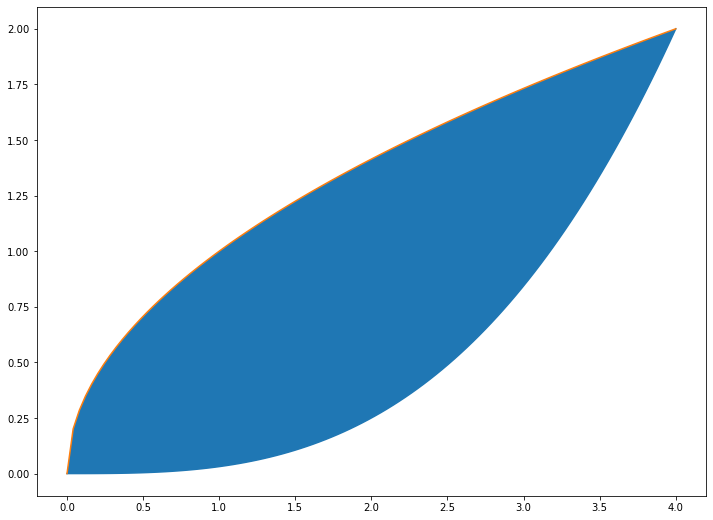

In [13]:
x = np.linspace(0,4,100)
y1 = x**3/32
y2 = sqrt(x)
plt.plot(x,y1,x,y2)
plt.gca().fill_between(x,y1,y2);

In [14]:
@interact
def _(s=(0,4,.02),axis=['x','y']):
    x = np.linspace(0,4,100)
    y1 = x**3/32
    y2 = sqrt(x)
    fig = plt.figure(figsize=(10,5))
    ax = fig.gca()
    ax.plot(x,y1,x,y2)
    ax.fill_between(x,y1,y2);
    if axis == 'x':
        ax.add_patch(Rectangle([s-.01,s**3/32],.02,sqrt(s)-s**3/32,color='red',alpha=.8))
    else:
        ax.add_patch(Rectangle([(s/2)**2,(s/2)-.01],(32*(s/2))**(1/3)-(s/2)**2,.02,color='red',alpha=.8))

interactive(children=(FloatSlider(value=2.0, description='s', max=4.0, step=0.02), Dropdown(description='axis'…

In [15]:
f = lambda y,x: x*y
g = lambda x: x**3/32
h = sqrt

dblquad(f, 0,4,g,h)[0]

6.666666666666666

In [16]:
f = lambda x,y: x*y
g = lambda y: (32*y)**(1/3)
h = lambda y: y**2

dblquad(f, 0,2,h,g)[0]

6.666666666654043

### Exercise

We want to find the volume of the solid region under the plane $x-2y+z=10$ and above the region bounded by $x+y=1$ and $x^2+y=1$.

  1. Sketch the region of integration.

  2. Choose an order of integration.

  3. Set up iterated integral.

## Polar Coordinates

Note that the area of the rectangle $\{(x,y) \mid x_1 \leq x \leq x_2, y_1 \leq y \leq y_2 \}$ is 

$$\Delta A = (x_2-x_1)(y_2-y_1) = \Delta x \Delta y $$

But what about a "polar rectangle"  $\{(r \cos \theta,r \sin \theta) \mid r_1 \leq r \leq r_2, \theta_1 \leq \theta \leq \theta_2 \}$?

In [17]:
@interact
def _(s=(0,1,.1),angle=(-127,6,6)):
    fig = plt.figure(figsize=(12,6))
    ax= fig.add_subplot(121)
    ax2 = fig.add_subplot(122,projection='3d')
    r = np.linspace(1,2,8)
    th = np.linspace(0,pi/3,8)
    t = np.linspace(0,1,26)
    for x in r:
        ax.plot((1-s)*x*np.ones_like(t) + s*(x*cos(t*pi/3)),(1-s)*t*pi/3 + s*(x*sin(t*pi/3)),'k')
    for y in th:
        ax.plot((1-s)*(1+t) + s*(1+t)*cos(y),(1-s)*y*np.ones_like(t)+ s*(1+t)*sin(y),'k')

    for x in r:
        ax2.plot((1-s)*x*np.ones_like(t) + s*(x*cos(t*pi/3)),(1-s)*t*pi/3 + s*(x*sin(t*pi/3)),0*t,'k')
    for y in th:
        ax2.plot((1-s)*(1+t) + s*(1+t)*cos(y),(1-s)*y*np.ones_like(t)+ s*(1+t)*sin(y),0*t,'k')
        
    for a in [ax,ax2]:
        if s == 0:
            a.set_xlabel('$r$',fontsize=20)
            a.set_ylabel('$\\theta$',fontsize=20)
        elif s == 1:
            a.set_xlabel('$x$',fontsize=20)
            a.set_ylabel('$y$',fontsize=20)
        else:
            a.set_xlabel(' ',fontsize=20)
            a.set_ylabel(' ',fontsize=20)
            
    R,TH = np.meshgrid(r,th)
    
    X = (1-s)*R + s*(R*cos(TH))
    Y = (1-s)*TH + s*(R*sin(TH))
    Z = 1 + R*cos(TH) + R*sin(TH)
    ax2.plot_surface(X,Y,Z,cmap='rainbow')
    ax2.view_init(35,angle)
   
    ax.set_xlim([0,2.5])
    ax.set_ylim([0,2.5])
    ax2.set_xlim3d([0,2.5])
    ax2.set_ylim3d([0,2.5])

interactive(children=(FloatSlider(value=0.0, description='s', max=1.0), IntSlider(value=-61, description='angl…

## Converting integrals to polar coordinates. 

Let $\mathcal{D}$ be the polar region defined by $r_1 \leq r \leq r_2, \theta_1 \leq \theta \leq \theta_2 $ and $f(x,y)$ a continuous function on $\mathcal D$. Then,

$$\iint_\mathcal D f dA = \int_{\theta_1}^{\theta_2} \int_{r_1}^{r_2} f(r \cos \theta,r \sin \theta )\,r\,dr\,d\theta$$ 



Remember to convert all parts of the integral:
  - the limits of integration
  - the integrand
  - the differential

## Examples

  1. Find the volume under a paraboloid $z=a^2-x^2-y^2$ annd above $z=0$ in terms of $a$ where $a>0$.
  
  3. Sketch the region of integration in the definite integral below and then evaluate it using polar coordinates.  $$\int_0^1\int_{\sqrt{1-x^2}}^{\sqrt{4-x^2}} x\,dy\,dx + \int_1^2\int_{0}^{\sqrt{4-x^2}} x\,dy\,dx$$
  
  2. Find the volume of the region above the $xy$-plane, under the surface $z=x^2+y^2$ and inside the cylinder $x^2 +(y-1)^2 =1$.
  


### Cool Example

Compute $$\int_{-\infty}^\infty e^{-x^2}\,dx.$$